In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("UniversalBank.csv")

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
df.shape

(5000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIP Code           5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
df.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [12]:
df = df.drop(["ID","ZIP Code"], axis= 1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [13]:
df.shape

(5000, 12)

In [14]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
SecuritiesAccount,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CDAccount,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

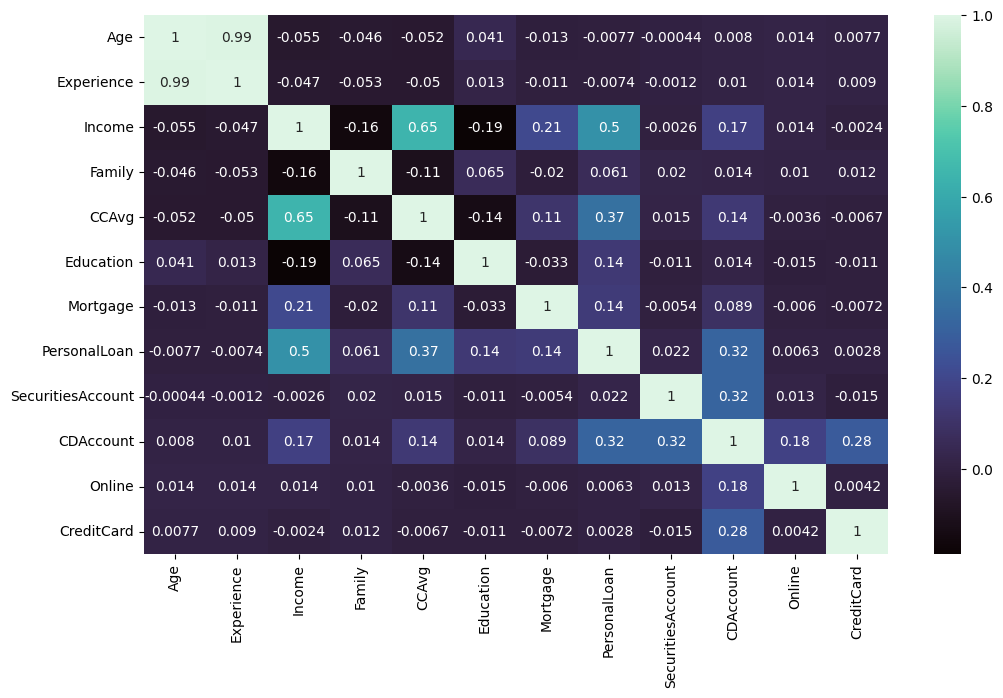

In [15]:
plt.figure(figsize= (12, 7))
sns.heatmap(df.corr(), annot = True, cmap= "mako")

In [16]:
for i in df.columns:
    print(df[i].unique())
    print("\n") # print(" ")

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]


[4 3 1 2]


[ 1.6   1.5   1.    2.7   0.4   0.3   0.6 

In [17]:
# for i in df.columns.tolist():
#     print(df[i].value_counts())
#     print(" ")

In [18]:
class_0 = df[df.CreditCard == 0]
class_0.shape

(3530, 12)

In [19]:
class_1 = df[df.CreditCard == 1]
class_1.shape

(1470, 12)

Text(0, 0.5, 'Experience')

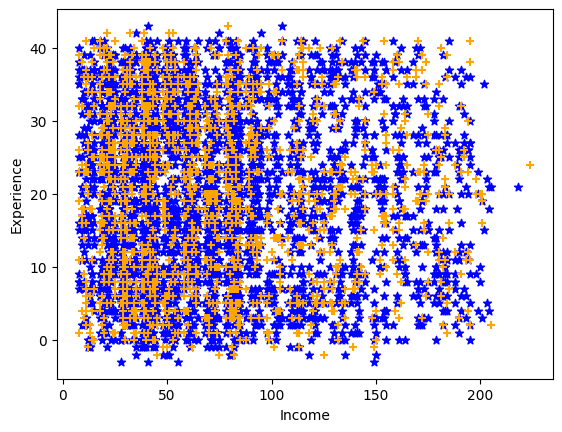

In [20]:
plt.scatter(class_0["Income"], class_0["Experience"], color = "b", marker= "*")
plt.scatter(class_1["Income"], class_1["Experience"], color = "orange", marker= "+")

plt.xlabel("Income")
plt.ylabel("Experience")

In [21]:
X = df.drop("CreditCard", axis= 1)
y = df["CreditCard"]

In [22]:
scaler = StandardScaler()

In [23]:
scaled = scaler.fit(X).transform(X)

In [24]:
df_scaled = pd.DataFrame(scaled, columns= df.columns[: -1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [25]:
X = df_scaled

**Simple SVM**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 75)

In [27]:
svm = SVC()

In [28]:
svm.fit(X_train, y_train)

SVC()

In [29]:
y_predict_svm = svm.predict(X_test)

In [30]:
accuracy_svm = accuracy_score(y_test, y_predict_svm)
print("Accuracy of SVM : ", accuracy_svm)

Accuracy of SVM :  0.7536


<Axes: >

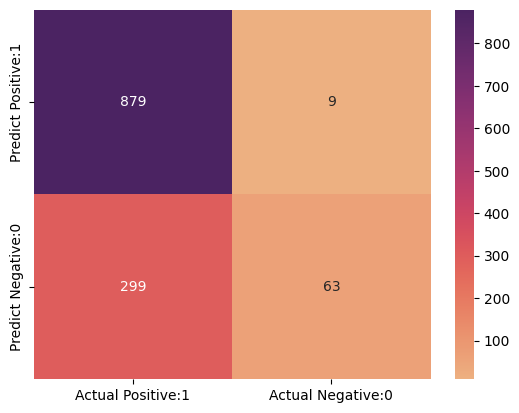

In [31]:
confusion_matrix = confusion_matrix(y_test, y_predict_svm)

df_confusion_matrix = pd.DataFrame(data= confusion_matrix, columns= ["Actual Positive:1", "Actual Negative:0"], 
                                                           index= ["Predict Positive:1", "Predict Negative:0"])

sns.heatmap(df_confusion_matrix, annot= True, fmt= "d", cmap= "flare")

In [32]:
class_report_svm = classification_report(y_test, y_predict_svm)
print(class_report_svm)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       888
           1       0.88      0.17      0.29       362

    accuracy                           0.75      1250
   macro avg       0.81      0.58      0.57      1250
weighted avg       0.78      0.75      0.69      1250



## SVM Kernel Functionsl


**Sigmoid Kernel**

In [33]:
sig_svm = SVC(kernel= "sigmoid", C= 2)

In [34]:
sig_svm.fit(X_train, y_train)

SVC(C=2, kernel='sigmoid')

In [35]:
y_predict_sig_svm = sig_svm.predict(X_test)

In [36]:
accuracy_sig_svm = accuracy_score(y_test, y_predict_sig_svm)
print("Accuracy SVM - Kernel = Sigmoid : ", accuracy_sig_svm)

Accuracy SVM - Kernel = Sigmoid :  0.64


**Linear Kernel**

In [37]:
lr_svm = SVC(kernel= "linear")

In [38]:
lr_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [39]:
y_predict_lr_svm = lr_svm.predict(X_test)

In [40]:
accuracy_lr_svm = accuracy_score(y_test, y_predict_lr_svm)
print("Accuracy SVM - Kernel = Linear : ", accuracy_lr_svm)

Accuracy SVM - Kernel = Linear :  0.756


**Polynomial Kernel**

In [41]:
poly_svm = SVC(kernel= "poly", C= 2)

In [42]:
poly_svm.fit(X_train, y_train)

SVC(C=2, kernel='poly')

In [43]:
y_predict_poly_svm = poly_svm.predict(X_test)

In [44]:
accuracy_poly_svm = accuracy_score(y_test, y_predict_poly_svm)
print("Accuracy SVM - Kernel = Polynomial : ", accuracy_poly_svm)

Accuracy SVM - Kernel = Polynomial :  0.7496


**Gaussian RBF kernel**

In [45]:
rbf_svm = SVC(kernel= "rbf")

In [46]:
rbf_svm.fit(X_train, y_train)

SVC()

In [47]:
y_predict_rbf_svm = rbf_svm.predict(X_test)

In [48]:
accuracy_rbf_svm = accuracy_score(y_test, y_predict_rbf_svm)
print("Accuracy SVM - Kernel = Gaussian RBF : ", accuracy_rbf_svm)

Accuracy SVM - Kernel = Gaussian RBF :  0.7536
